In [ ]:
pip install -U spacy #spacy library installation

Requirement already up-to-date: spacy in /usr/local/lib/python3.6/dist-packages (2.3.4)


In [ ]:
!pip install --upgrade gensim #gensim library instalation

Requirement already up-to-date: gensim in /usr/local/lib/python3.6/dist-packages (3.8.3)


In [ ]:
pip install pyLDAvis 

     |████████████████████████████████| 1.6MB 6.0MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=4ff8e7d8279470c8109fb3bb40179874d3db6d1bf1eafcc0b000dfeb45eb2389
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [ ]:
#installation of mallets package
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'




openjdk version "11.0.9.1" 2020-11-04
OpenJDK Runtime Environment (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
--2020-12-08 20:02:18--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip.2’

mallet-2.0.8.zip.2  100%[===================>]  15.43M  5.57MB/s    in 2.8s    

2020-12-08 20:02:21 (5.57 MB/s) - ‘mallet-2.0.8.zip.2’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
replace mallet-2.0.8/bin/classifier2info? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!python -m spacy download pt_core_news_sm #download of spacy core for for portuguese

✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')


In [ ]:
#importing libraries

import re
import spacy
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk import tokenize    
import re
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
import gensim.corpora as corpora
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import math
import csv
from math import sqrt
from gensim.models.wrappers import LdaMallet

mallet_path = '/content/mallet-2.0.8/bin/mallet' # you should NOT need to change this 

In [ ]:
df = pd.DataFrame(pd.read_csv("dataset.csv")) #import the dataset with transcriptions of interviews 
df

# correcting some errons in lemmatization

for entrevista in range(0,37):
  df["txt_lemmas"][entrevista] = df["txt_lemmas"][entrevista].replace('estudante','aluno')
  df["txt_lemmas"][entrevista] = df["txt_lemmas"][entrevista].replace('professorar','professor')
  df["txt_lemmas"][entrevista] = df["txt_lemmas"][entrevista].replace('alunar','aluno')
  df["txt_lemmas"][entrevista] = df["txt_lemmas"][entrevista].replace('redar','rede')
  df["txt_lemmas"][entrevista] = df["txt_lemmas"][entrevista].replace('vidar','vida')
  df["txt_lemmas"][entrevista] = df["txt_lemmas"][entrevista].replace('livrar','livro')
  df["txt_lemmas"][entrevista] = df["txt_lemmas"][entrevista].split()

dados = pd.DataFrame(df['txt_lemmas'])
dados


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: Setti

,txt_lemmas
0,"[olá, olhar, educação, começar, programar, red..."
1,"[olá, olhar, educação, começar, programar, com..."
2,"[olá, olhar, educação, começar, programar, com..."
3,"[olá, olhar, educação, começar, programar, com..."
4,"[olá, olhar, educação, começar, compromisso, r..."
5,"[olá, olhar, educação, começar, programar, com..."
6,"[olá, olhar, educação, começar, programar, com..."
7,"[olá, olhar, educação, começar, programar, com..."
8,"[olá, olhar, educação, começar, programar, com..."
9,"[olá, bem-vindo, estrear, agora, olhar, educaç..."


In [ ]:
# df visualization
df

,Unnamed: 0,title,link,txt_gerado,txt_limpo,txt_stop,txt_lemmas,tokens,txt_stem
0,0,A educação começa em casa,https://www.youtube.com/watch?v=-VHEGpbNxIY,[Música]\n\nolá\n\nde olho na educação está co...,olá de olho na educação está começando este é ...,olá olho educação começando programa rede emis...,"[olá, olhar, educação, começar, programar, red...","['olá', 'de', 'olhar', 'o', 'educação', 'estar...",olá olh educ começ program red emis públic edu...
1,1,A Educação como prioridade _ De Olho na Educaç...,https://www.youtube.com/watch?v=51fN1ncXX4s,[Música]\n\n[Música]\n\nolá\n\nde olho na educ...,olá de olho na educação está começando este pr...,olá olho educação começando programa compromis...,"[olá, olhar, educação, começar, programar, com...","['olá', 'de', 'olhar', 'o', 'educação', 'estar...",olá olh educ começ program compromiss red emis...
2,2,A importância da nova Base Nacional Comum Curr...,https://www.youtube.com/watch?v=8b5NaRDr_rY,[Música]\n\nolá\n\nde olho na educação está co...,olá de olho na educação está começando este pr...,olá olho educação começando programa compromis...,"[olá, olhar, educação, começar, programar, com...","['olá', 'de', 'olhar', 'o', 'educação', 'estar...",olá olh educ começ program compromiss red emis...
3,3,A reforma do Ensino Médio irá mudar o cenário ...,https://www.youtube.com/watch?v=3BsIY9RgbJA,[Música]\n\nolá\n\nde olho na educação está co...,olá de olho na educação está começando este pr...,olá olho educação começando programa compromis...,"[olá, olhar, educação, começar, programar, com...","['olá', 'de', 'olhar', 'o', 'educação', 'estar...",olá olh educ começ program compromiss red emis...
4,4,Alfabetização no Brasil_ o que melhorar,https://www.youtube.com/watch?v=ydYx0dfkxSo,[Música]\n\nolá\n\nde olho na educação está co...,olá de olho na educação está começando um comp...,olá olho educação começando compromisso rede e...,"[olá, olhar, educação, começar, compromisso, r...","['olá', 'de', 'olhar', 'o', 'educação', 'estar...",olá olh educ começ compromiss red emis públic ...
5,5,As dificuldades de implementação da nova Base ...,https://www.youtube.com/watch?v=M3wZnBBMREg,[Música]\n\nolá\n\nde olho na educação está co...,olá de olho na educação está começando este pr...,olá olho educação começando programa compromis...,"[olá, olhar, educação, começar, programar, com...","['olá', 'de', 'olhar', 'o', 'educação', 'estar...",olá olh educ começ program compromiss red emis...
6,6,As escolas estão formando bem seus alunos,https://www.youtube.com/watch?v=xYbtJFXoRnw,[Música]\n\nolá\n\nde olho na educação está co...,olá de olho na educação está começando este pr...,olá olho educação começando programa compromis...,"[olá, olhar, educação, começar, programar, com...","['olá', 'de', 'olhar', 'o', 'educação', 'estar...",olá olh educ começ program compromiss red emis...
7,7,As faculdades estão preparando bem nossos prof...,https://www.youtube.com/watch?v=LiOcLtwHAqI,[Música]\n\n[Música]\n\nolá\n\nde olho na educ...,olá de olho na educação está começando este pr...,olá olho educação começando programa compromis...,"[olá, olhar, educação, começar, programar, com...","['olá', 'de', 'olhar', 'o', 'educação', 'estar...",olá olh educ começ program compromiss red emis...
8,8,Como está a situação do ensino médio,https://www.youtube.com/watch?v=7YM_IN_-zMQ,[Música]\n\nolá\n\nde olho na educação está co...,olá de olho na educação está começando este pr...,olá olho educação começando programa compromis...,"[olá, olhar, educação, começar, programar, com...","['olá', 'de', 'olhar', 'o', 'educação', 'estar...",olá olh educ começ program compromiss red emis...
9,9,Como está o ensino no Brasil hoje,https://www.youtube.com/watch?v=njmxnQ-pbOM,[Música]\n\nolá bem-vindo estreia agora os de ...,olá bem-vindo estreia agora os de olho na educ...,olá bem-vindo estreia agora olho educação prog...,"[olá, bem-vindo, estrear, agora, olhar, educaç...","['olá', 'bem-vindo', 'estrear', 'agora', 'o', ...",olá bem-v estre agor 

In [ ]:
# stopwords list
stopwords =  ['ir', 'lá', 'mil','aí', 'cento', 'paulo', 'cada', 'onde','dois', 'três', 'maria', 'nado' 'área', 'usar', 'vezar', 'fato', 'vir', '%','aqui', 'falar', 'ainda','agora', 'outro','saber', 'querer', 'olhar', 'muito', 'assim', 'dessar', 'ea', 'fazer', 'ter', 'dizer', 'todo', 'gente', 'então', 'dar', 'ano', 'porque', 'ser', 'achar', 'né', 'pra', 'ver', 'algum', 'coisa', 'ficar', 'estar']

bigram = gensim.models.Phrases(dados.txt_lemmas, min_count=1, threshold=1) # higher threshold fewer phrases
bigram_mod = gensim.models.phrases.Phraser(bigram) #construct bigrams
trigram = gensim.models.Phrases(bigram[dados.txt_lemmas], threshold=1) 
trigram_mod = gensim.models.phrases.Phraser(trigram) #construct trigrams

print(trigram_mod[bigram_mod[dados.txt_lemmas[0]]])

for entrevista in dados: 
   dados[entrevista] = dados[entrevista].apply(lambda row: ([word for word in row if (not word in stopwords)])) # stopwords removal
   dados[entrevista] = dados[entrevista].apply(lambda row: (trigram_mod[bigram_mod[row]])) # apply trigrams model

dados
  






['olá_olhar_educação_começar', 'programar_rede_emissora_público', 'educativo_brasil', 'proposto_discutir', 'situação_atual_escola_professor', 'aluno_querer_apontar_caminho', 'melhoria_sistema', 'ensinar_aprendizagem', 'país_porque', 'horar_mudar_agora_escolher', 'bem_ir_votar_votar', 'educação_hoje', 'ir_conversar', 'sobrar_educação', 'dever_ver', 'casar', 'costumar_dizer', 'convida', 'falar_sobrar', 'assunto', 'ver', 'mar', 'melar', 'educador', 'integrante', 'conselho_estadual', 'educação_bom', 'noite', 'água', 'noite_maria', 'educação', 'ver_casar', 'educação_todo', 'sempre', 'querer', 'dar_filho', 'querer', 'ter', 'querer_todo', 'pai', 'brasil', 'poder_dar', 'filho', 'proteção', 'caro', 'limite', 'estimular', 'independência', 'reflete', 'achar', 'neste_momento', 'interessante', 'falar_pouco', 'tipo', 'educação', 'vir_casar', 'ajudar_criança', 'desempenhar_melhor', 'escola', 'relação', 'existir', 'educação_família', 'educação', 'escola', 'tom', 'ir_pensar', 'pouco', 'termo', 'tipo_fa

,txt_lemmas
0,"[olá, educação_começar_programar_rede, emissor..."
1,"[olá, educação_começar_programar_compromisso, ..."
2,"[olá, educação_começar_programar_compromisso, ..."
3,"[olá, educação_começar_programar_compromisso, ..."
4,"[olá, educação_começar, compromisso_rede, emis..."
5,"[olá, educação_começar_programar_compromisso, ..."
6,"[olá, educação_começar_programar_compromisso, ..."
7,"[olá, educação_começar_programar_compromisso, ..."
8,"[olá, educação_começar_programar_compromisso, ..."
9,"[olá, bem-vindo, estrear, educação_programar, ..."


In [ ]:
# get most frequent words
def get_most_freq_words(str, n=None):
    vect = CountVectorizer().fit(str) # vector transformation for interview
    bag_of_words = vect.transform(str) # bag of words construction for interview
    sum_words = bag_of_words.sum(axis=0) # sum of frequencies
    freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    freq =sorted(freq, key = lambda x: x[1], reverse=True)
    return freq[:n]
  
get_most_freq_words([ word for interv in dados.txt_lemmas for word in interv],50)





[('professor', 307),
 ('aluno', 289),
 ('escola', 288),
 ('poder', 245),
 ('educação', 192),
 ('criança', 179),
 ('país', 141),
 ('hoje', 134),
 ('brasil', 133),
 ('exemplo', 123),
 ('trabalhar', 120),
 ('importante', 113),
 ('ensinar', 111),
 ('pouco', 109),
 ('pessoa', 108),
 ('preciso', 101),
 ('ensinar_médio', 95),
 ('passar', 93),
 ('questão', 92),
 ('mundo', 84),
 ('estudar', 83),
 ('precisar', 83),
 ('dever', 82),
 ('primeiro', 81),
 ('médio', 79),
 ('tempo', 79),
 ('bom', 79),
 ('conseguir', 77),
 ('existir', 76),
 ('família', 75),
 ('grande', 75),
 ('problema', 72),
 ('sala_aula', 72),
 ('conhecimento', 71),
 ('partir', 71),
 ('bem', 69),
 ('novo', 69),
 ('fundamental', 69),
 ('melhor', 68),
 ('aprender', 68),
 ('aula', 67),
 ('brasileiro', 67),
 ('tudo', 66),
 ('formar', 66),
 ('casar', 62),
 ('pai', 62),
 ('chegar', 62),
 ('sempre', 61),
 ('relação', 59),
 ('menos', 59)]

In [ ]:
dictionary = Dictionary(dados.txt_lemmas)

# build the corpus i.e. vectors with the number of occurence of each word per interview
corpus = [dictionary.doc2bow(word) for word in dados.txt_lemmas]

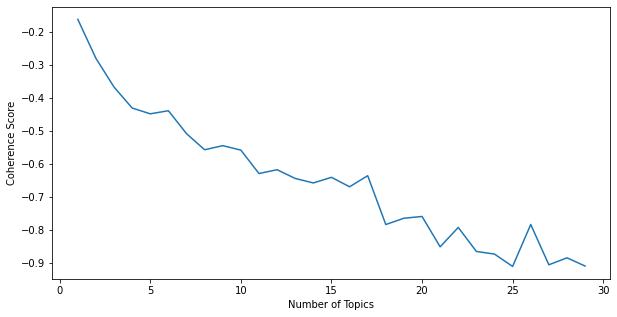

In [ ]:


# compute coherence
coherence = []
for nb_topics in range(1,30):
    ldamallet = LdaMallet(mallet_path, corpus=corpus, num_topics=nb_topics, id2word=dictionary)
    gensimmodel = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)
    
    cohm = CoherenceModel(model=gensimmodel, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    coh = cohm.get_coherence()
    coherence.append(coh)

                                         
# visualize coherence
plt.figure(figsize=(10,5))
plt.plot(range(1,30), coherence)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score");

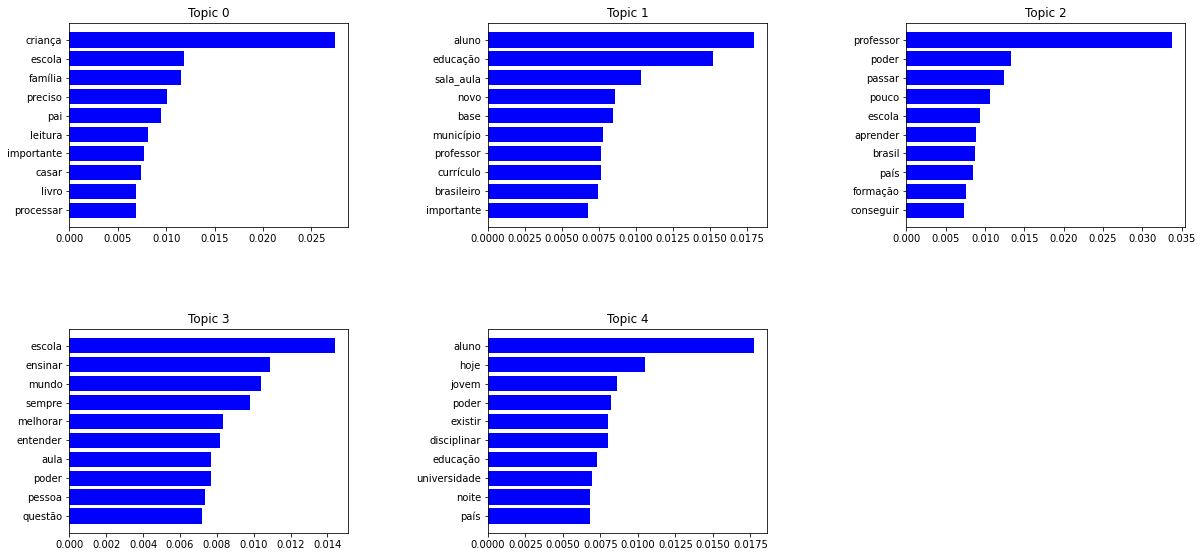

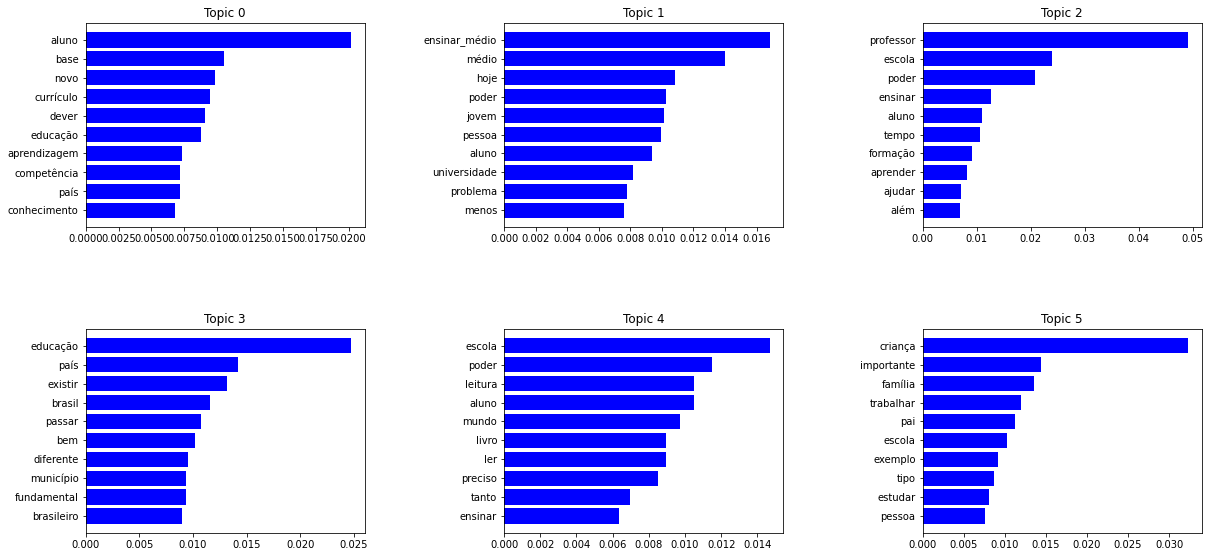

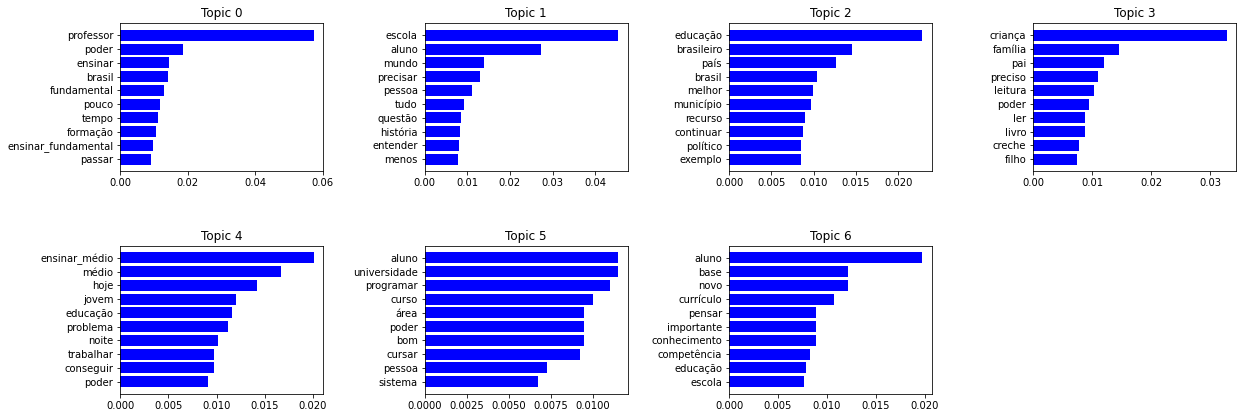

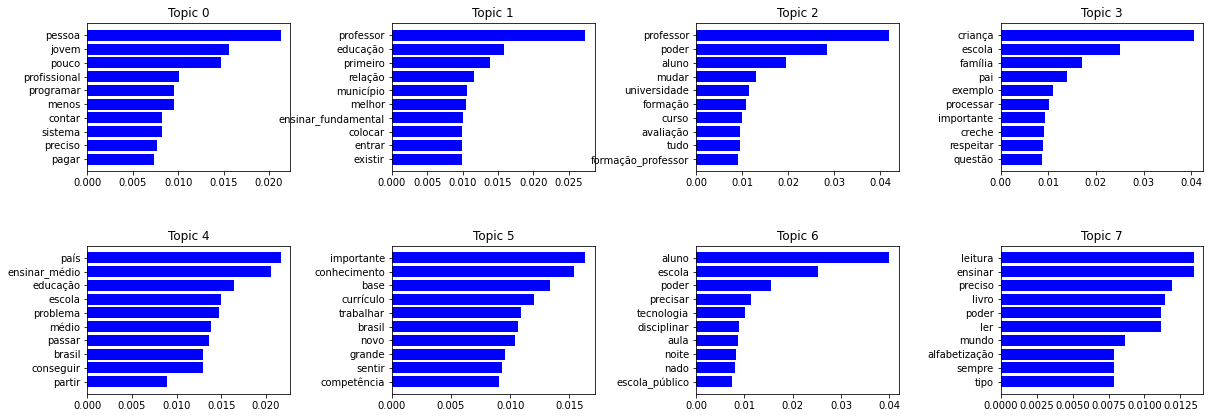

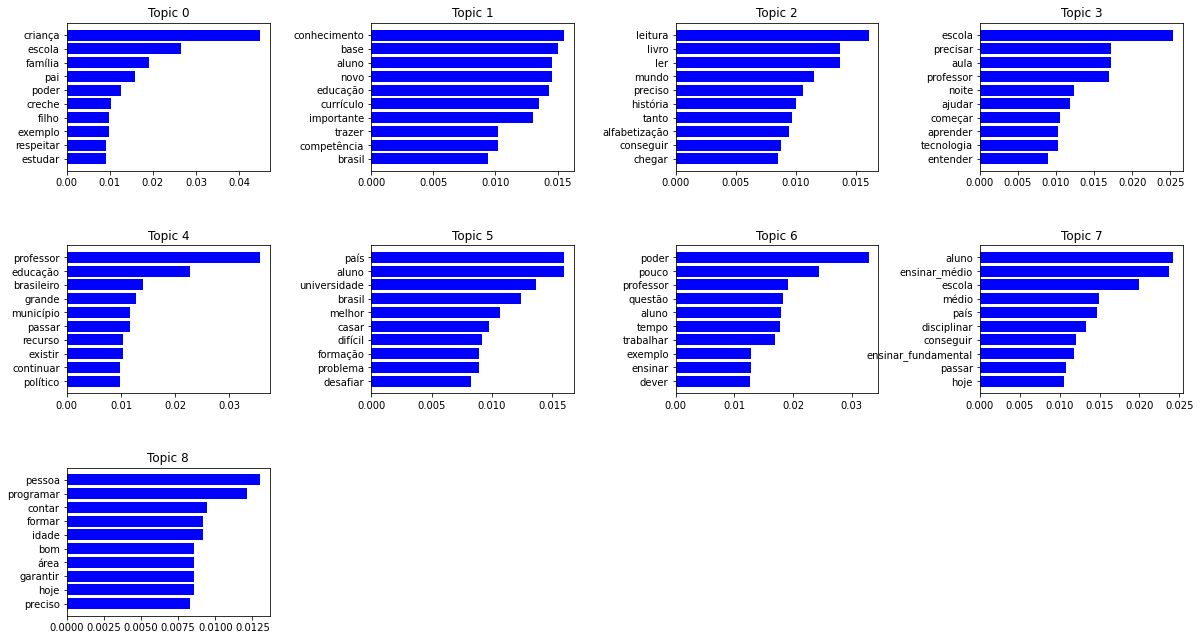

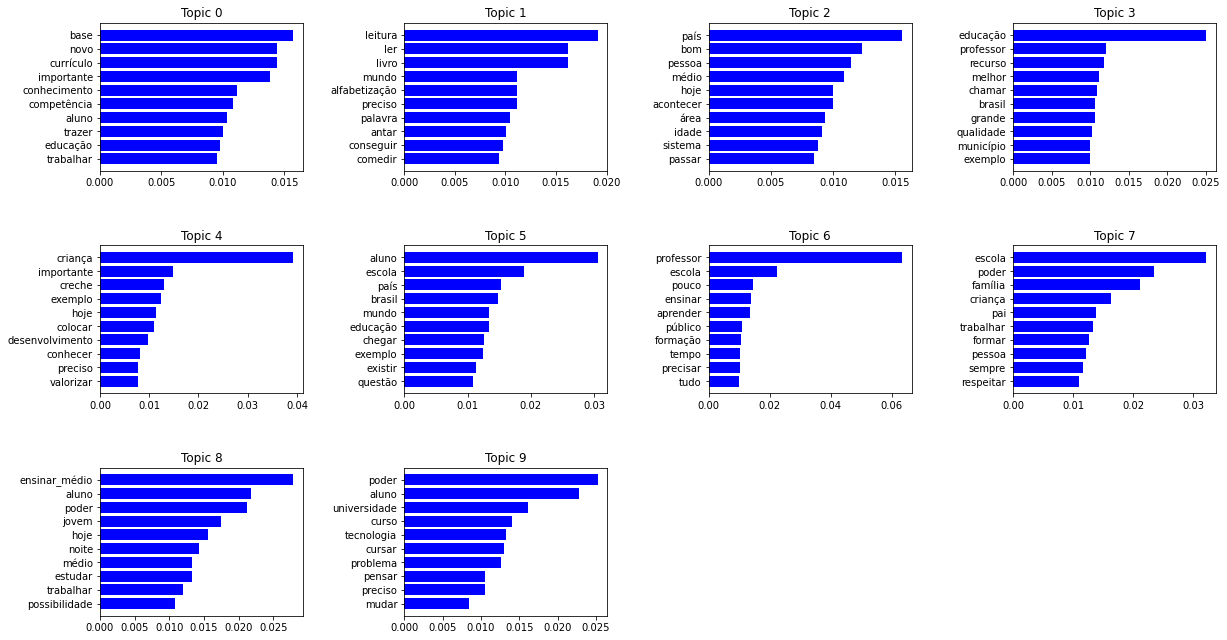

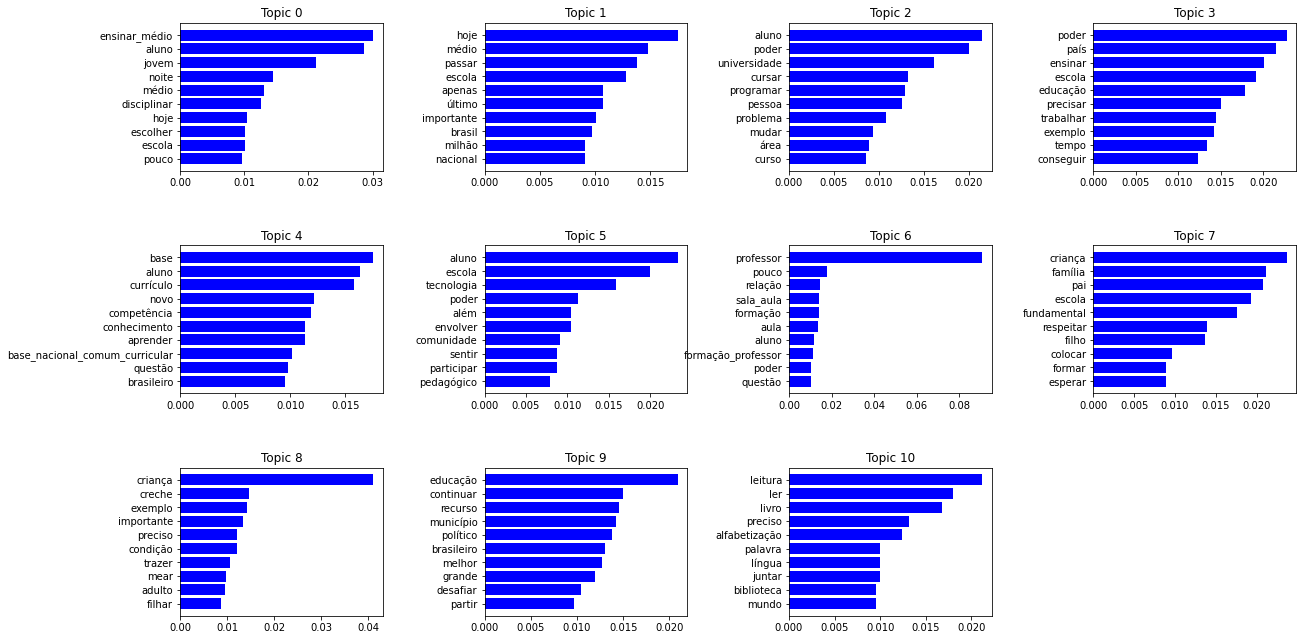

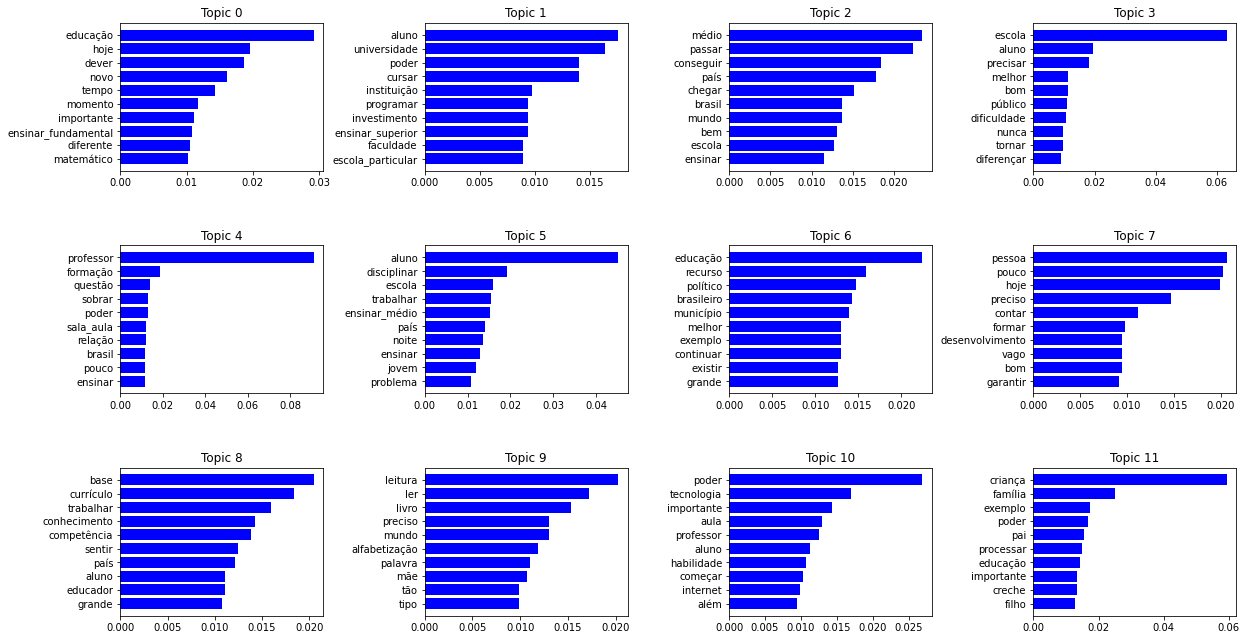

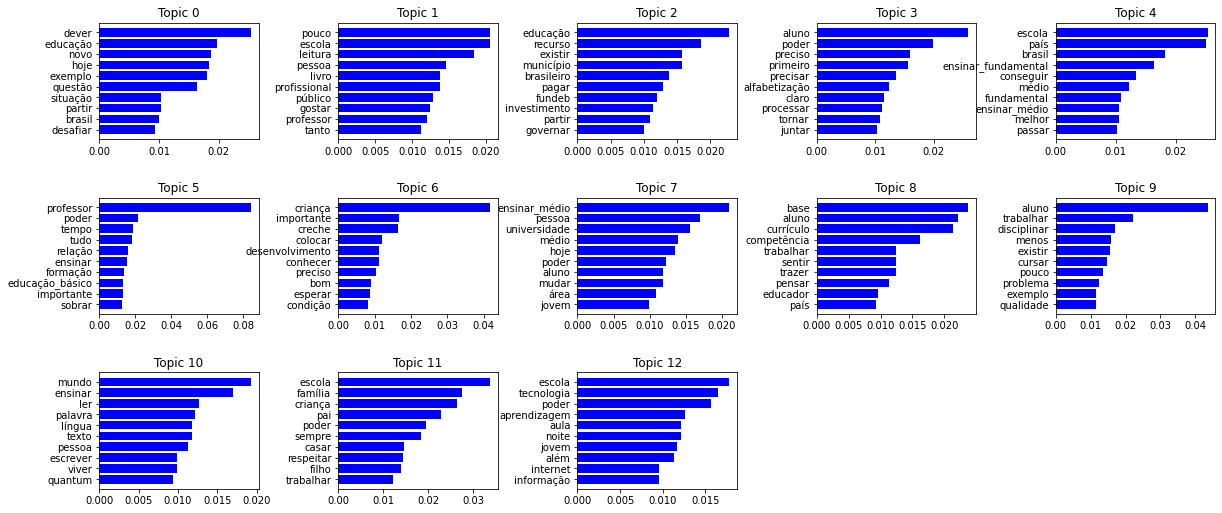

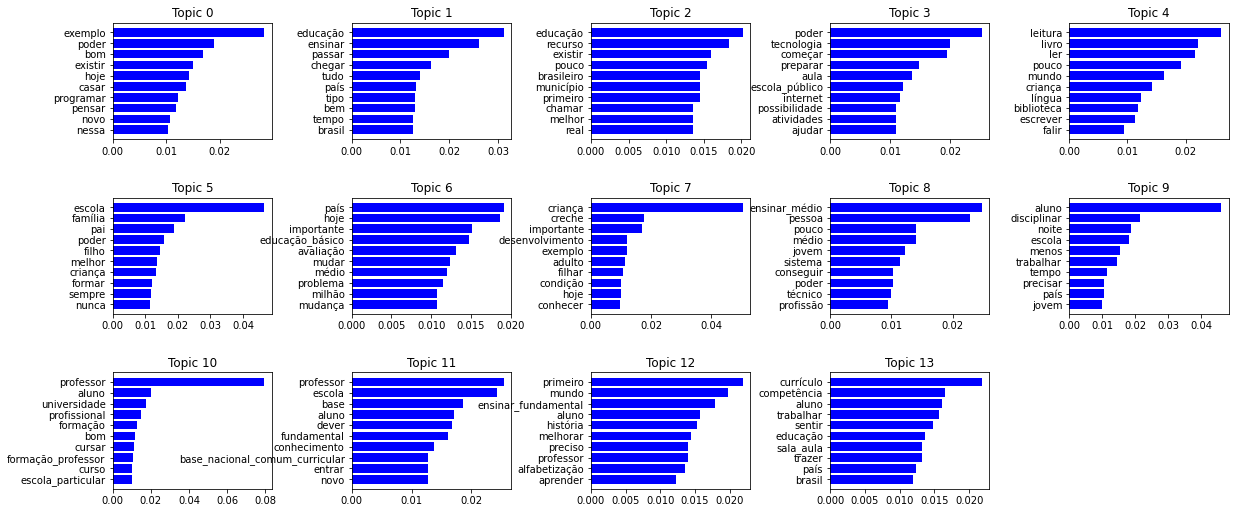

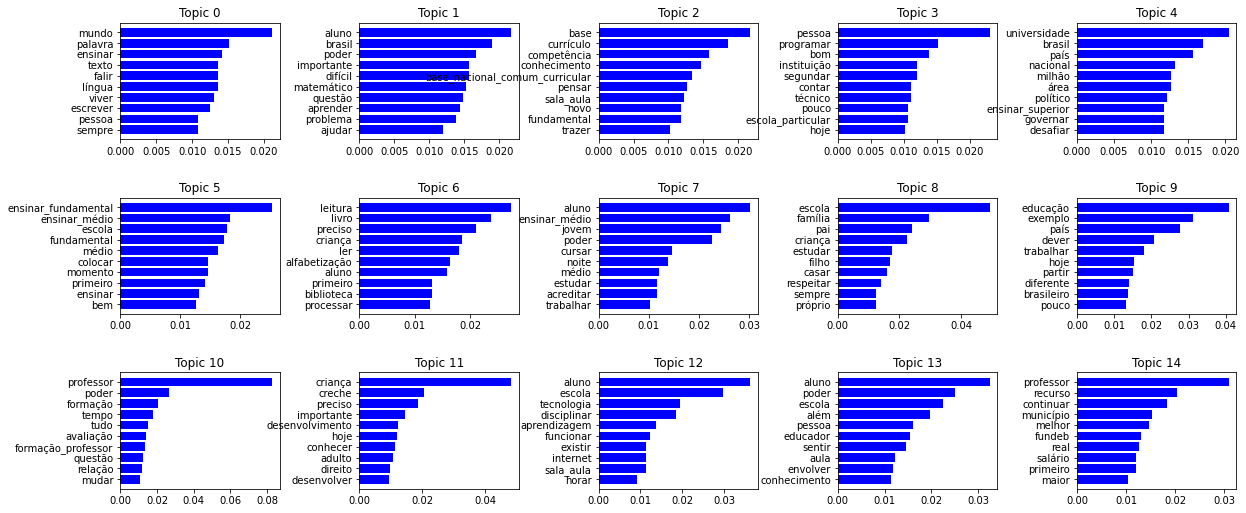

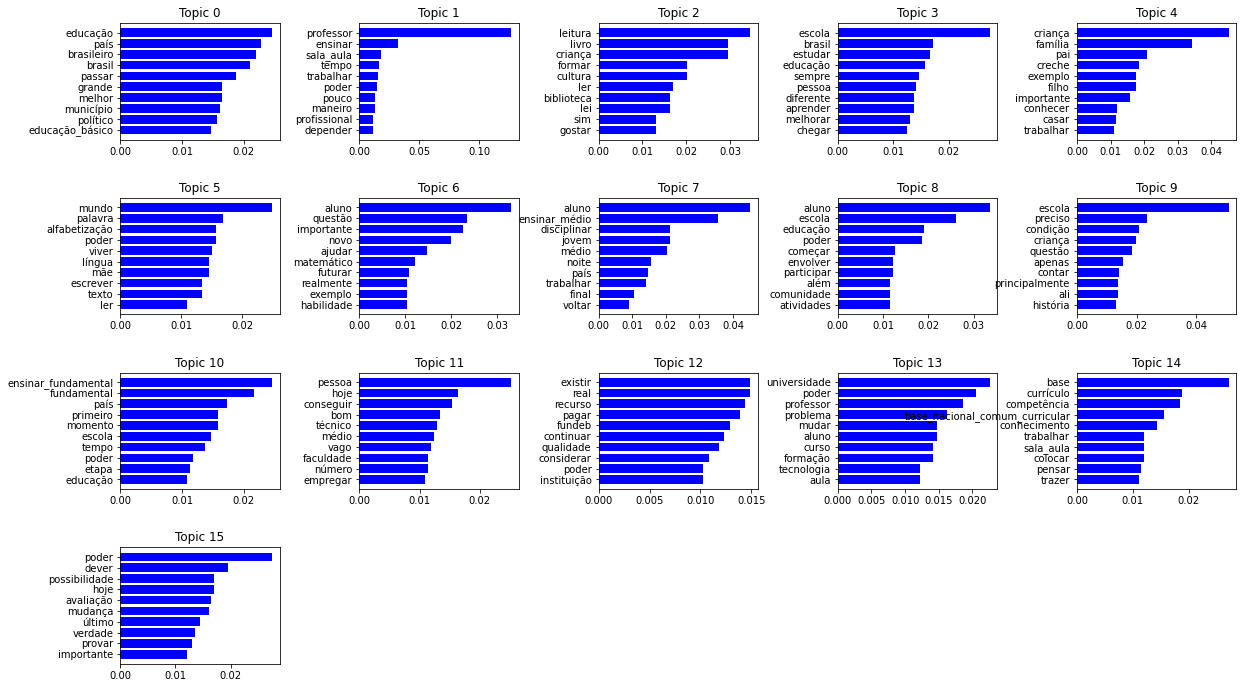

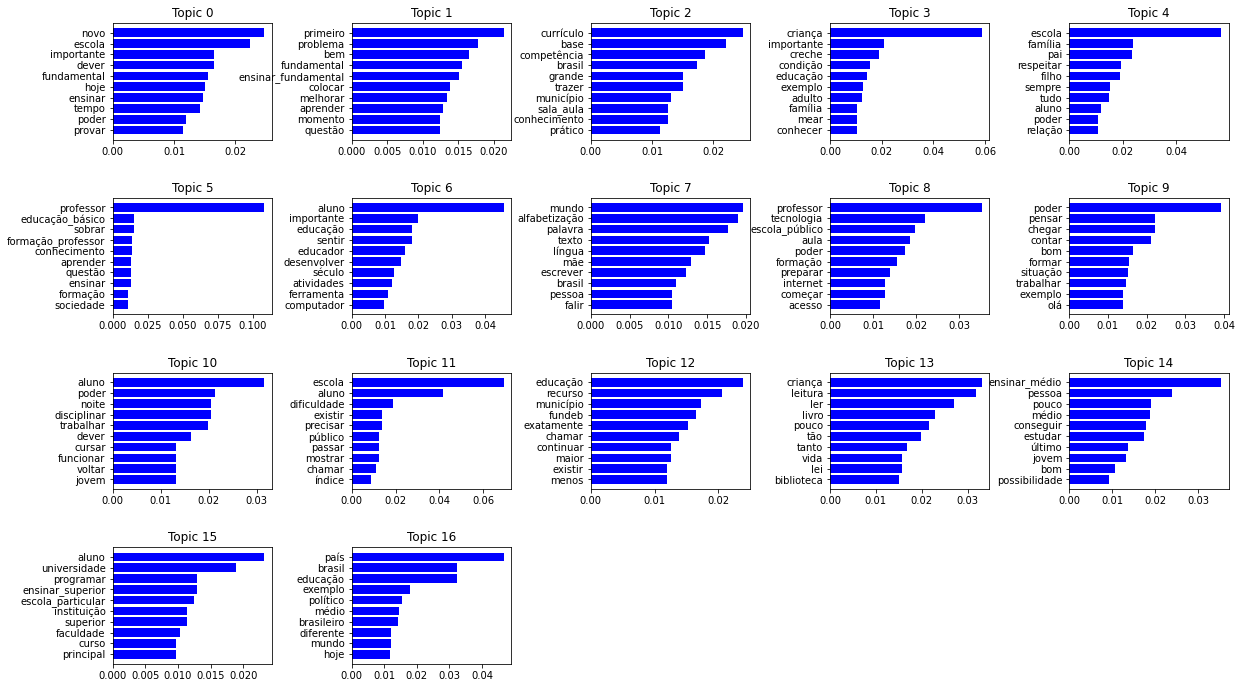

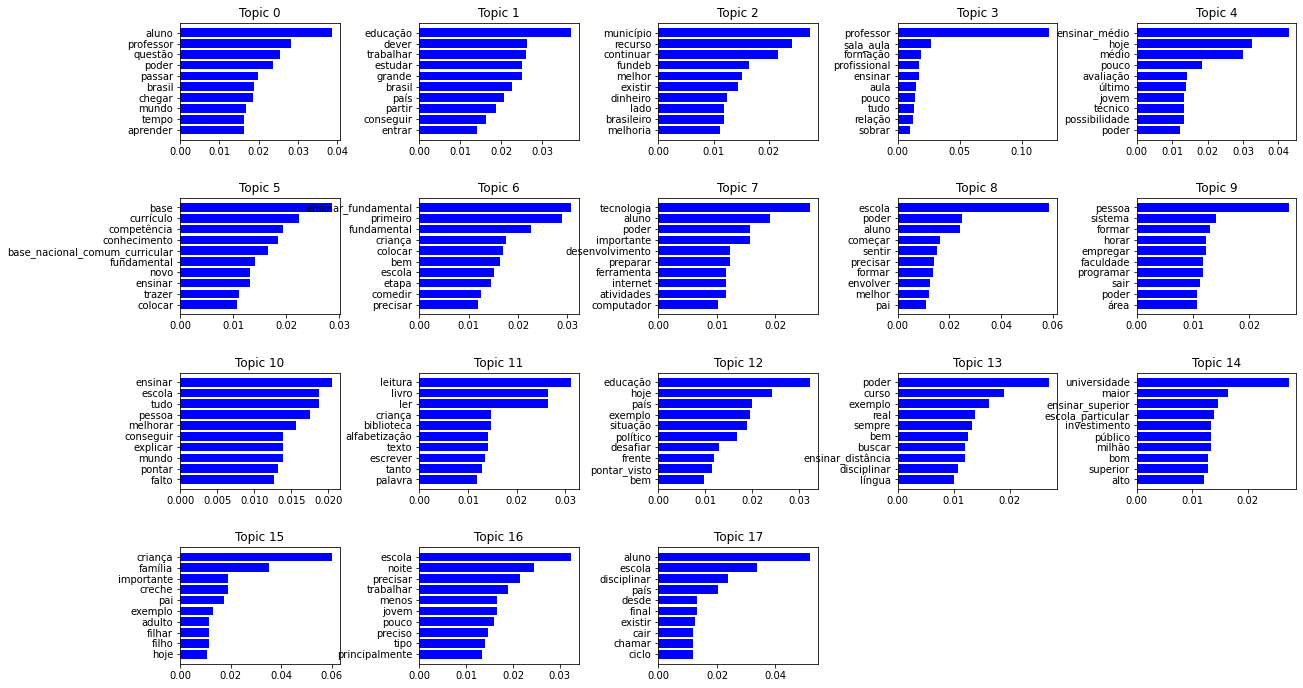

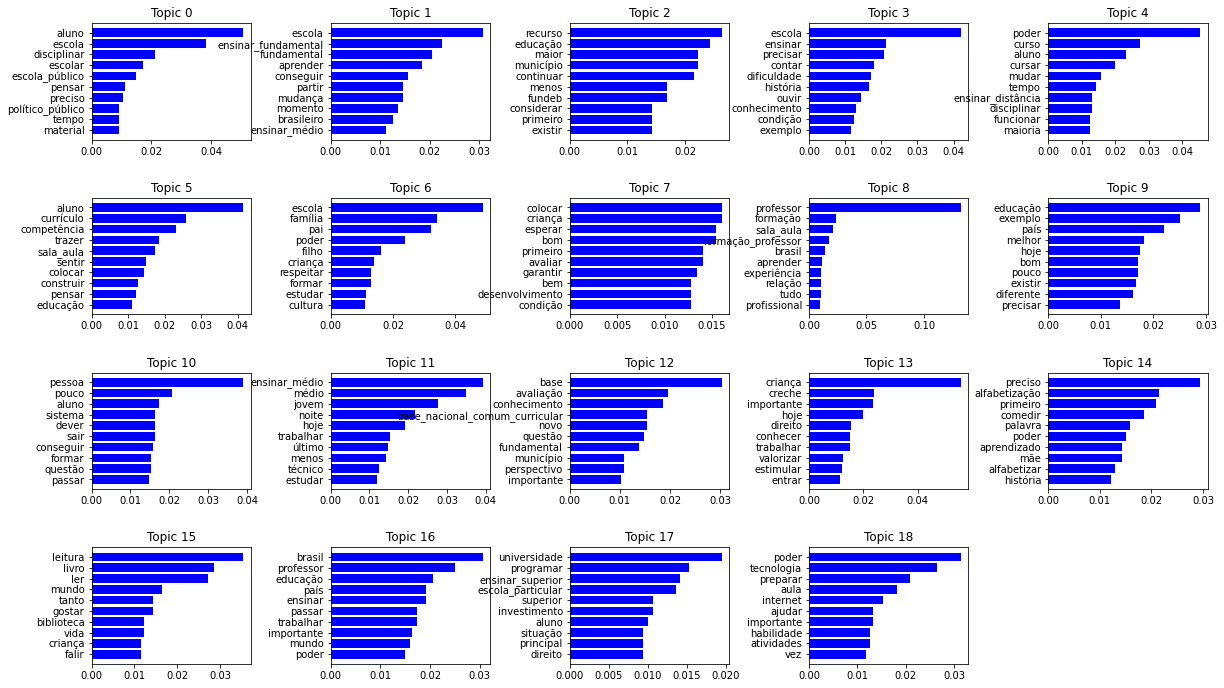

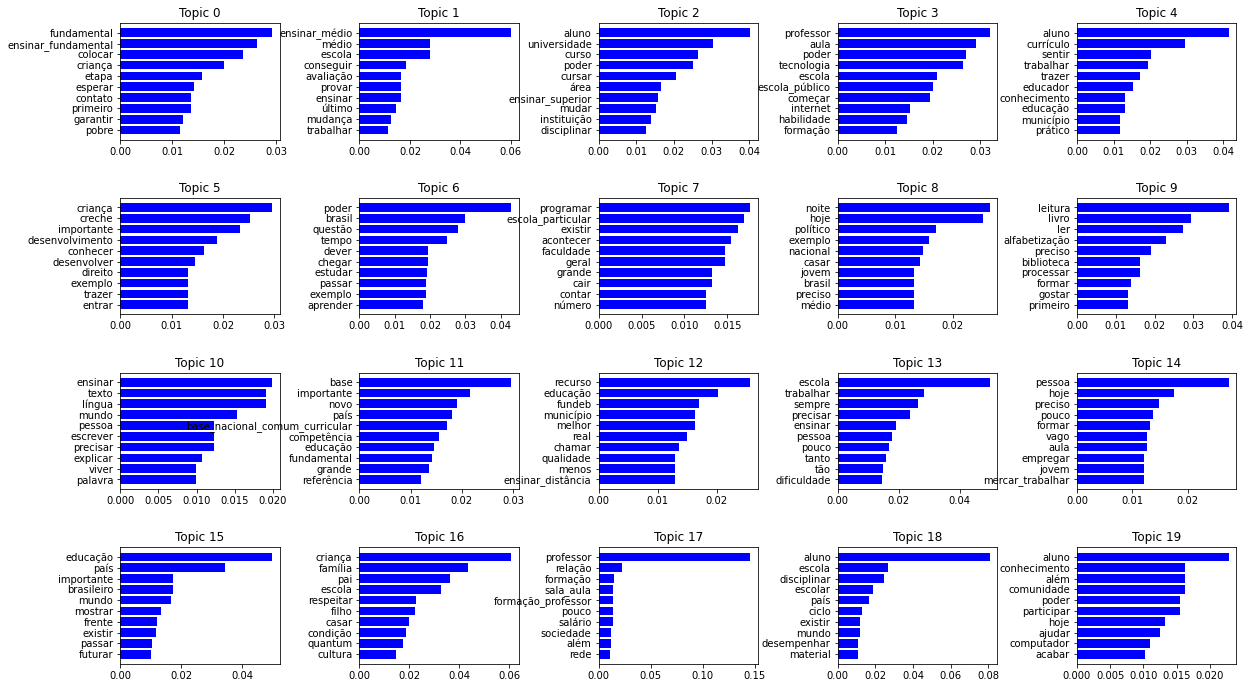

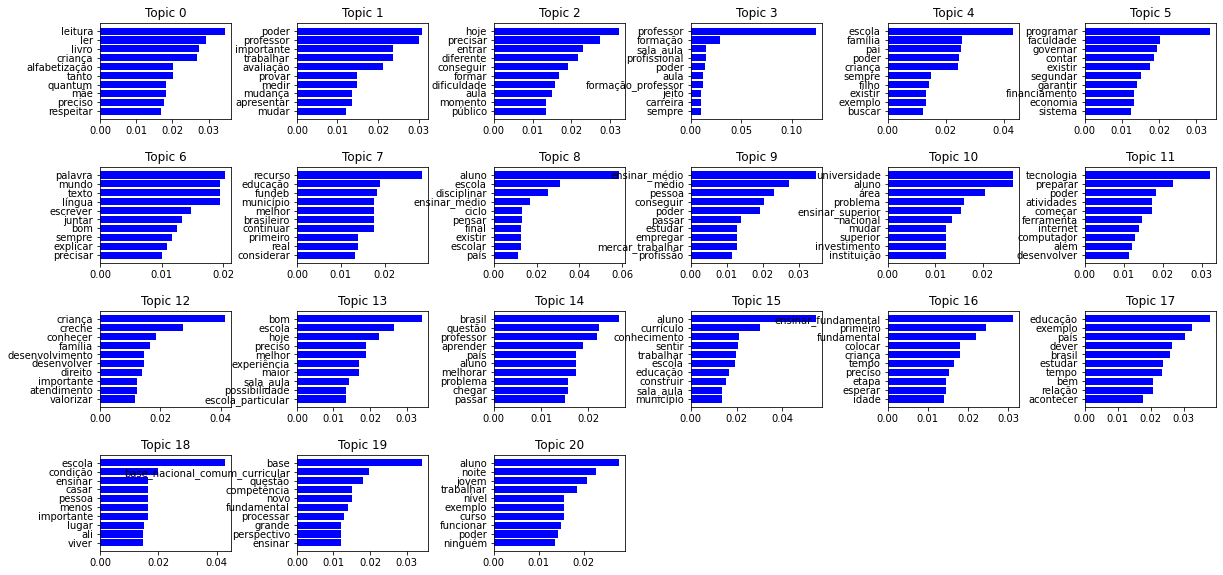

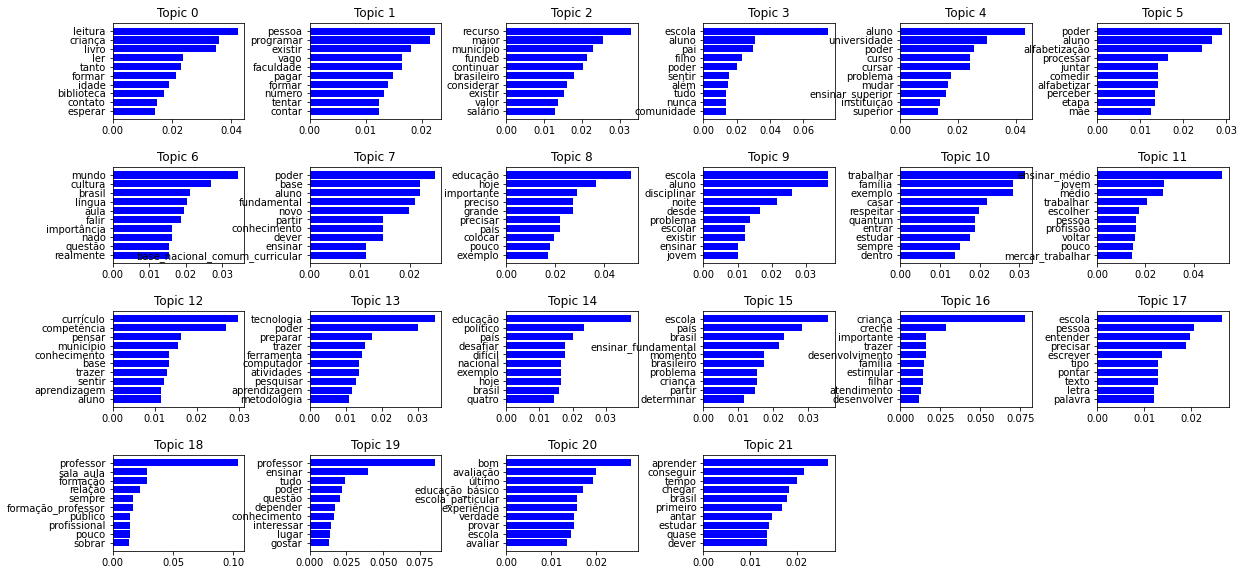

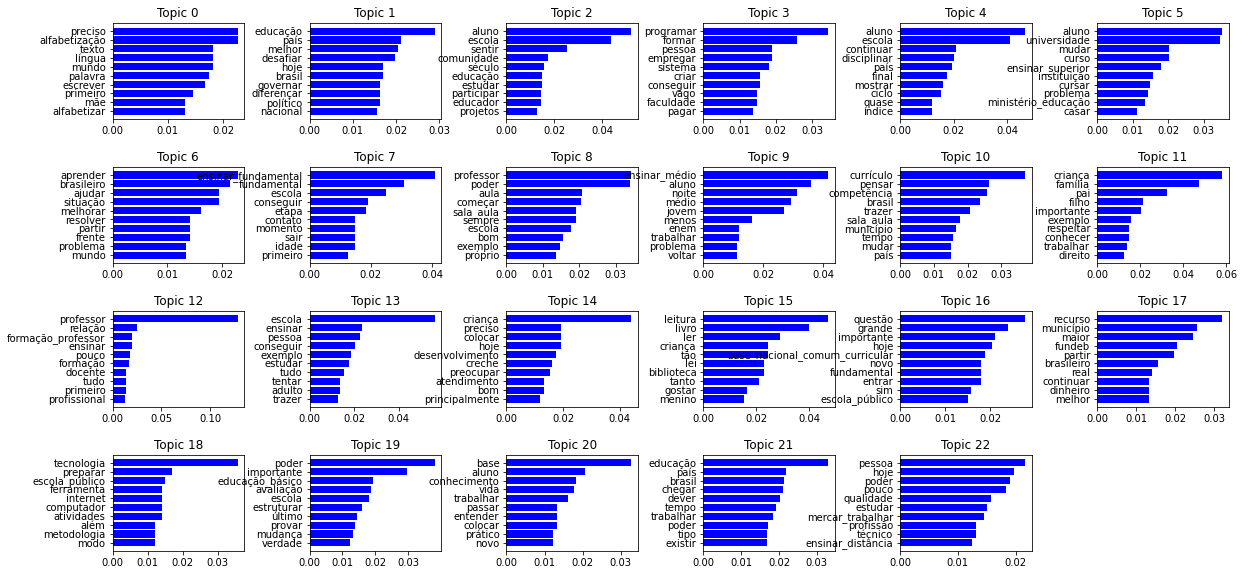

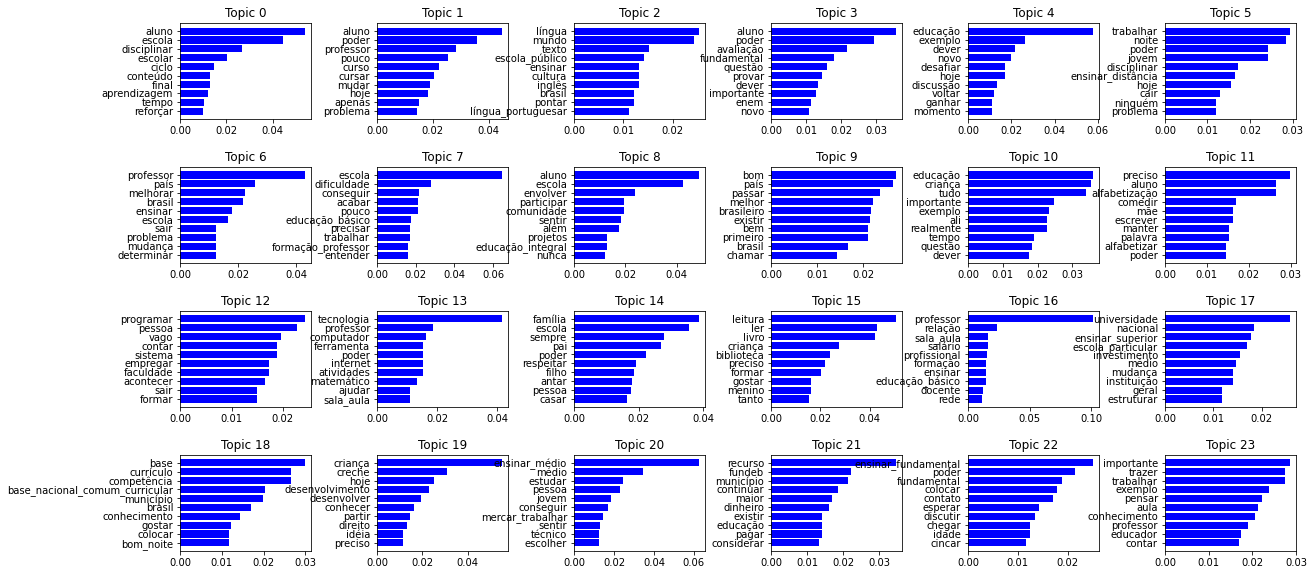

In [ ]:
for x in range(5,25): #construct the model for each k
  ldamallet = LdaMallet(mallet_path, corpus=corpus, num_topics=x, id2word=dictionary)
  lda = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)

  # plot the model
  def plot_top_words(lda=lda,nb_topics=x,nb_words=10):
    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(sqrt(x))+1,round(sqrt(x))+1)
    gs.update(wspace=0.5, hspace=0.5)
    plt.figure(figsize=(20,15))
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='blue', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(nb_words))
        ax.set_yticklabels(top_words[i][:nb_words])
        plt.title("Topic "+str(i))

  plot_top_words()
